Raw Dataset:
    Emp_ID Department    Q1    Q2    Q3    Q4
0     201         IT  80.0  85.0   NaN  90.0
1     202         HR  70.0   NaN  75.0  80.0
2     203         IT  90.0  95.0  92.0  94.0
3     204      Sales   NaN  65.0  70.0  75.0
4     205         HR  78.0  82.0  79.0  85.0
5     206         IT  88.0  84.0  90.0  86.0
6     202         HR  70.0   NaN  75.0  80.0
7     207      Sales  65.0  70.0   NaN  68.0
8     208      Sales  72.0  75.0  78.0   NaN
9     209         IT  91.0  87.0  89.0  93.0

Cleaned Dataset:
    Emp_ID Department     Q1      Q2         Q3      Q4
0     201         IT  80.00  85.000  81.857143  90.000
1     202         HR  70.00  80.375  75.000000  80.000
2     203         IT  90.00  95.000  92.000000  94.000
3     204      Sales  79.25  65.000  70.000000  75.000
4     205         HR  78.00  82.000  79.000000  85.000
5     206         IT  88.00  84.000  90.000000  86.000
7     207      Sales  65.00  70.000  81.857143  68.000
8     208      Sales  72.00  75.

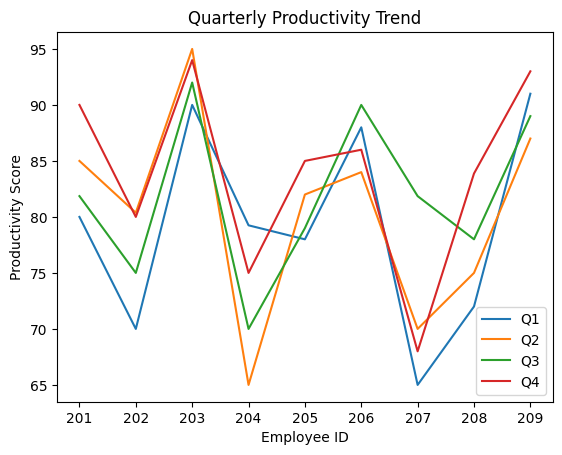

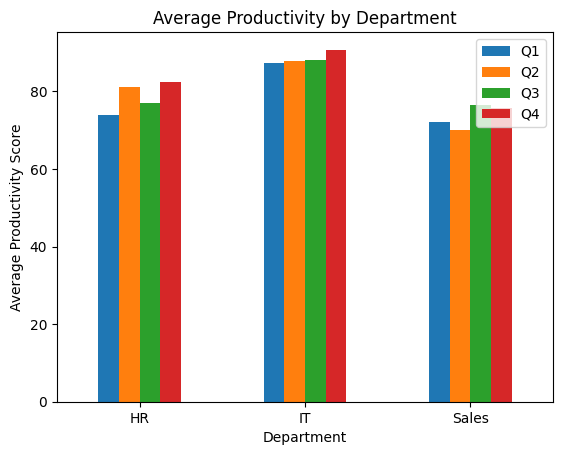

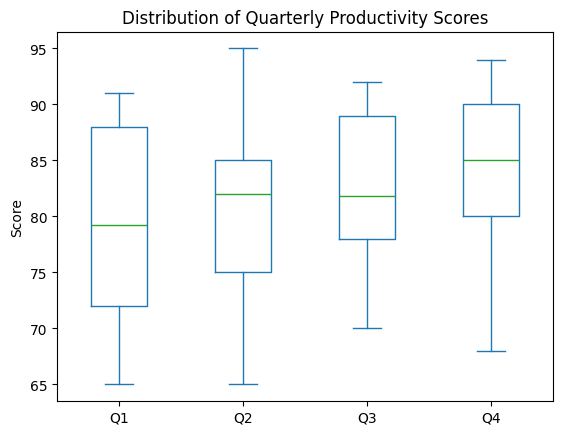

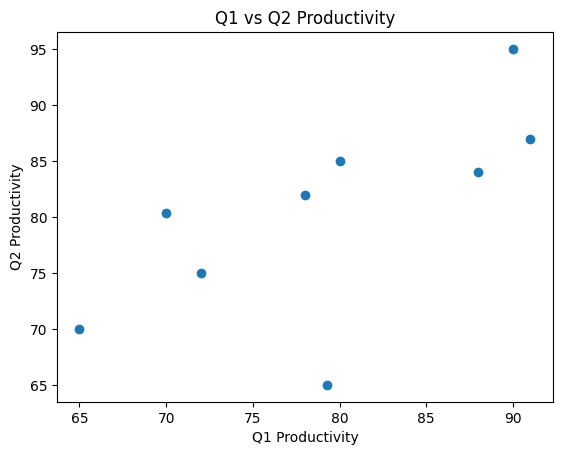

In [ ]:
# ---------------------------------------------
# Employee Productivity Analysis & Visualization
# ---------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/employee_productivity.csv")

# Display raw data
print("Raw Dataset:\n", df)

# ---------------------------------------------
# Data Cleaning
# ---------------------------------------------

# Remove duplicate rows
df_clean = df.drop_duplicates()

# Impute missing values using column means
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))

print("\nCleaned Dataset:\n", df_clean)

# ---------------------------------------------
# 1. Line Chart – Productivity Trend Across Quarters
# ---------------------------------------------
plt.plot(df_clean["Emp_ID"], df_clean["Q1"], label="Q1")
plt.plot(df_clean["Emp_ID"], df_clean["Q2"], label="Q2")
plt.plot(df_clean["Emp_ID"], df_clean["Q3"], label="Q3")
plt.plot(df_clean["Emp_ID"], df_clean["Q4"], label="Q4")

plt.xlabel("Employee ID")
plt.ylabel("Productivity Score")
plt.title("Quarterly Productivity Trend")
plt.legend()
plt.show()

# ---------------------------------------------
# 2. Bar Chart – Average Productivity per Department
# ---------------------------------------------
dept_avg = df_clean.groupby("Department")[["Q1", "Q2", "Q3", "Q4"]].mean()

dept_avg.plot(kind="bar")
plt.title("Average Productivity by Department")
plt.xlabel("Department")
plt.ylabel("Average Productivity Score")
plt.xticks(rotation=0)
plt.show()

# ---------------------------------------------
# 3. Box Plot – Distribution of Scores per Quarter
# ---------------------------------------------
df_clean[["Q1", "Q2", "Q3", "Q4"]].plot(kind="box")
plt.title("Distribution of Quarterly Productivity Scores")
plt.ylabel("Score")
plt.show()

# ---------------------------------------------
# 4. Scatter Plot – Relationship Between Two Quarters
# ---------------------------------------------
plt.scatter(df_clean["Q1"], df_clean["Q2"])
plt.xlabel("Q1 Productivity")
plt.ylabel("Q2 Productivity")
plt.title("Q1 vs Q2 Productivity")
plt.show()
